In [16]:
import pandas as pd
import numpy as np
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

# File to Load (Remember to Change These)
file_to_load = "name_clean.csv"

# Read Name File and store into Pandas data frame
name_df = pd.read_csv(file_to_load)
del name_df['Unnamed: 0']
name_df.head()

,decades,state,gender,name,number
0,10s,AK,F,Mary,189
1,10s,AK,F,Margaret,92
2,10s,AK,F,Helen,89
3,10s,AK,F,Annie,53
4,10s,AK,F,Anna,52


### Top Names of all time, all states, all genders, all decades

In [3]:
top_names = name_df.groupby('name').sum().sort_values(by='number', ascending=False)
top_x = top_names.head(30).reset_index()
top_x

,name,number
0,James,5015584
1,John,4885284
2,Robert,4749154
3,Michael,4366524
4,William,3901134
5,Mary,3750838
6,David,3605910
7,Richard,2544867
8,Joseph,2528437
9,Charles,2280600


In [4]:
x_values = [top_x['name'].values[x] for x in range(len(top_x))]
y_values = [top_x['number'].values[x] for x in range(len(top_x))]
color = ['skyblue','skyblue','skyblue','skyblue','skyblue','red','skyblue','skyblue','skyblue','skyblue']

In [14]:
#test_dict = {}
#for index, row in top_x.iterrows():
#    test_dict[row['name']] = row['number']
#print(test_dict)
    

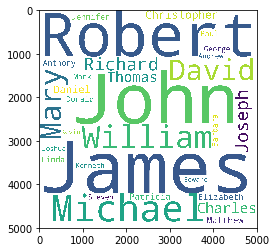

In [96]:
wc = WordCloud(background_color="white",width=5000,height=5000, max_words=len(test_dict),relative_scaling=1,normalize_plurals=False).generate_from_frequencies(test_dict)
plt.imshow(wc)

([<matplotlib.axis.XTick at 0x11dd286d8>,
 <a list of 30 Text xticklabel objects>)

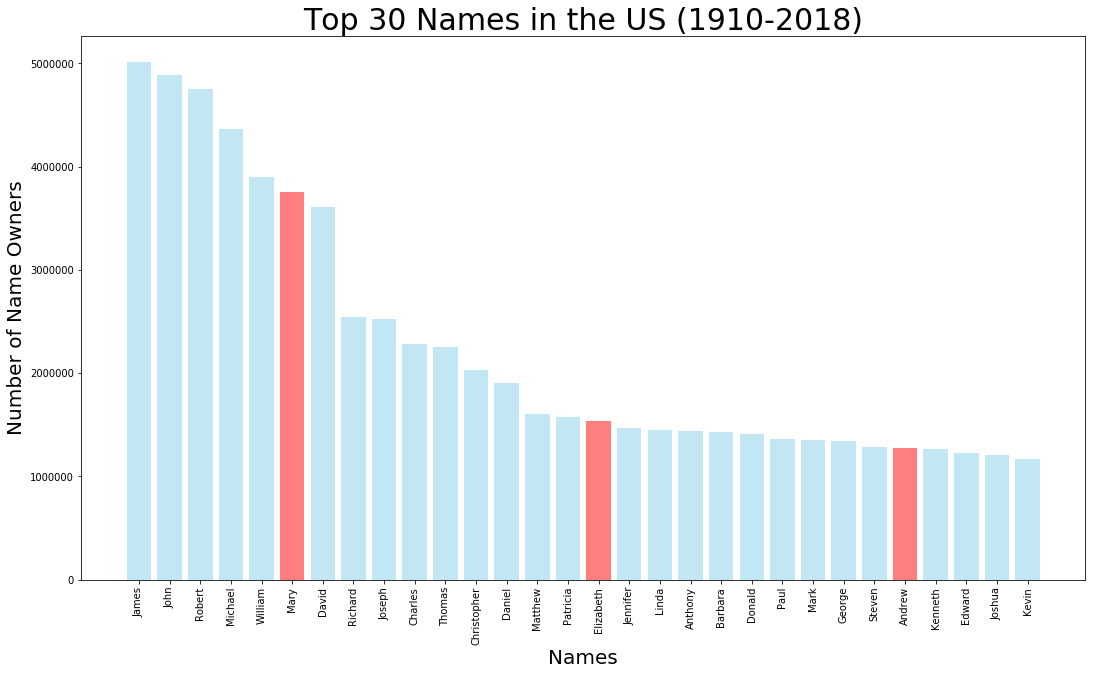

In [28]:
plt.bar(x_values, y_values, color=color, alpha=0.5, align="center")
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(18, 10)
# Incorporate the other graph properties
plt.title(f"Top {len(top_x)} Names in the US (1910-2018)",size = 30)
plt.ylabel("Number of Name Owners",size=20)
plt.xlabel("Names",size=20)
plt.xticks(top_x['name'],rotation='vertical')


In [29]:
fig.savefig('top30.png')

In [8]:
# Start with one review:
#text = top_x

# Create and generate a word cloud image:
#wordcloud = WordCloud().generate(text)

# Display the generated image:
#plt.imshow(wordcloud, interpolation='bilinear')
#plt.axis("off")
#plt.show()

In [9]:
test = [top_x['name'].values[i] for i in range(len(top_x))]
test
abc  = top_x.head(5)
abc

,name,number
0,James,5015584
1,John,4885284
2,Robert,4749154
3,Michael,4366524
4,William,3901134


### Top Names of all time, all states

In [10]:
name_df2 = name_df.groupby(['gender','name']).sum().reset_index()
top_x_gender = name_df2.groupby(['gender'], as_index=False).apply(lambda x: x.nlargest(5, 'number'))
top_x_gender_fin = top_x_gender.reset_index()[top_x_gender.columns[0:6]]
top_x_gender_fin

,gender,name,number
0,F,Mary,3741196
1,F,Patricia,1569022
2,F,Elizabeth,1537684
3,F,Jennifer,1466161
4,F,Linda,1447943
5,M,James,4997327
6,M,John,4869607
7,M,Robert,4734038
8,M,Michael,4349307
9,M,William,3890923


### Top Names by Decade by Gender

In [60]:
name_df3 = name_df.groupby(['decades','gender','name']).sum().reset_index()
sorter = ['10s','20s','30s','40s','50s','60s','70s','80s','90s','00s','2010s']
top_x_decade = name_df3.groupby(['decades','gender'], as_index=False).apply(lambda x: x.nlargest(5, 'number'))
top_x_decade_fin = top_x_decade.reset_index()[top_x_decade.columns[0:6]]
top_x_decade_fin.head(10)

,decades,gender,name,number
0,00s,F,Emily,223690
1,00s,F,Madison,193152
2,00s,F,Emma,181257
3,00s,F,Olivia,156000
4,00s,F,Hannah,155698
5,00s,M,Jacob,273844
6,00s,M,Michael,250554
7,00s,M,Joshua,231926
8,00s,M,Matthew,221513
9,00s,M,Daniel,203720


In [73]:
name_df3 = name_df.groupby(['decades','gender','name']).sum().reset_index()

decade_order = ["10s", "20s", "30s", "40s", "50s", "60s", "70s","80s","90s","00s","2010s"]
name_plot = name_df3.set_index("decades").loc[decade_order]
name_plot.head()

,gender,name,number
decades,,,
10s,F,Abbie,625
10s,F,Abigail,25
10s,F,Ada,15053
10s,F,Adah,81
10s,F,Adaline,191


In [79]:
name_F_decade = name_plot.loc[name_plot['gender']=='F',:].groupby(['decades']).count().loc[decade_order].reset_index()
name_M_decade = name_plot.loc[name_plot['gender']=='M',:].groupby(['decades']).count().loc[decade_order].reset_index()
#.loc[['10s','20s','30s','40s','50s','60s','70s','80s','90s','00s','2010s']]
name_M_decade

,decades,gender,name,number
0,10s,2761,2761,2761
1,20s,3324,3324,3324
2,30s,2812,2812,2812
3,40s,2657,2657,2657
4,50s,2804,2804,2804
5,60s,2862,2862,2862
6,70s,3808,3808,3808
7,80s,5033,5033,5033
8,90s,6500,6500,6500
9,00s,7472,7472,7472


In [80]:
F_year = name_F_decade["decades"].tolist()
F_number = name_F_decade["number"].tolist()
M_year = name_M_decade["decades"].tolist()
M_number = name_M_decade["number"].tolist()
#urban_m = bubble_df.loc[bubble_df['type']=='Urban',:].groupby(['city']).mean()

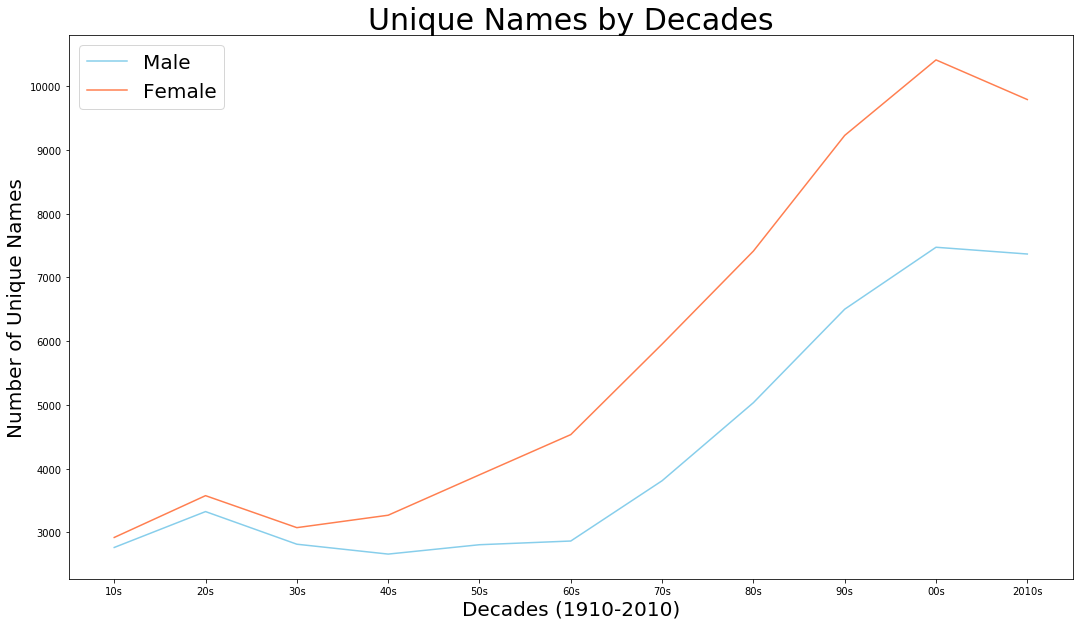

In [94]:
plt.plot(M_year,M_number,color='skyblue',label='Male')
plt.plot(F_year,F_number,color='coral',label='Female')
plt.xlabel("Decades (1910-2010)",size = 20)
plt.ylabel("Number of Unique Names",size = 20)
plt.title(f"Unique Names by Decades",size = 30)
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(18, 10)
lgnd = plt.legend(loc="upper left", fontsize=20)

In [95]:
fig.savefig('NameDiversity.png')

### MAP DATA

In [110]:
female_df = name_df.loc[name_df['gender']=='F',:].groupby(['gender','state']).count().reset_index()
female_df.head()


,gender,state,decades,name,number
0,F,AK,3107,3107,3107
1,F,AL,13308,13308,13308
2,F,AR,9983,9983,9983
3,F,AZ,11784,11784,11784
4,F,CA,41342,41342,41342


In [109]:
male_df = name_df.loc[name_df['gender']=='M',:].groupby(['gender','state']).count().reset_index()
male_df.head()


,gender,state,decades,name,number
0,M,AK,2611,2611,2611
1,M,AL,10582,10582,10582
2,M,AR,8113,8113,8113
3,M,AZ,8522,8522,8522
4,M,CA,27616,27616,27616
